# BÀI TẬP THỰC HÀNH 1.1.3 & 1.2.2
# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU - RED WINE QUALITY

**Mục tiêu:**
- Thực hiện thống kê mô tả trên tập dữ liệu rượu đỏ
- Trực quan hóa dữ liệu với Matplotlib và Seaborn
- Phân tích đơn biến và hai biến
- Phát hiện outliers và patterns

**Dữ liệu:** Red Wine Quality Dataset từ Kaggle

## 1. IMPORT THƯ VIỆN VÀ CẤU HÌNH

- Import pandas, numpy, matplotlib.pyplot, seaborn, scipy.stats, warnings
- Input: File CSV, Excel hoặc URL; Dữ liệu số (arrays, lists); DataFrame hoặc arrays
- Output: DataFrame object; Kết quả tính toán (mean, median, std, etc.); Các đối tượng figure và axes để hiển thị biểu đồ; Biểu đồ statistical với styling tốt hơn; Các giá trị thống kê và kết quả kiểm định
- Cấu hình

In [20]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Cấu hình pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Đã import thư viện thành công!")

✓ Đã import thư viện thành công!


## 2. NẠP VÀ KHÁM PHÁ DỮ LIỆU BAN ĐẦU

- Nạp dữ liệu từ URL
- Input: URL chứa file CSV của dữ liệu Red Wine Quality
- Output: DataFrame chứa 1599 dòng (mẫu rượu) và 12 cột (đặc trưng)
- Các cột bao gồm: fixed acidity, volatile acidity, citric acid, residual sugar,
                   chlorides, free sulfur dioxide, total sulfur dioxide, density,
                   pH, sulphates, alcohol, quality

In [21]:
# Nạp dữ liệu từ URL
url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/winequality-red-ms88wDE71haZsHsnmG1vbzNju2wVC6.csv"
wine_data = pd.read_csv(url)

print(f"✓ Đã nạp dữ liệu thành công!")
print(f"  Số dòng: {wine_data.shape[0]}")
print(f"  Số cột: {wine_data.shape[1]}")

✓ Đã nạp dữ liệu thành công!
  Số dòng: 1599
  Số cột: 12


In [22]:
# Hiển thị 5 dòng đầu tiên
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [23]:
# Thông tin về dữ liệu
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
# Kiểm tra kiểu dữ liệu
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 3. THỐNG KÊ MÔ TẢ

### 3.1. Kiểm tra giá trị thiếu và trùng lặp

- Kiểm tra giá trị thiếu (missing values/NaN)
-  Phương pháp: 
   1. isnull() tạo ma trận boolean (True nếu thiếu, False nếu có giá trị)
   2. sum() đếm số lượng True (giá trị thiếu) trong mỗi cột
- Output: Series hiển thị số lượng giá trị thiếu cho mỗi cột
- ---------------------------------------------------------------------------
- Kiểm tra giá trị trùng lặp (duplicate rows)
-  Phương pháp:
   1. duplicated() tạo Series boolean (True nếu dòng trùng lặp)
   2. sum() đếm số lượng dòng trùng lặp
- Output: Số lượng và tỷ lệ phần trăm dòng trùng lặp


In [25]:
# Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu trong từng cột:")
print(wine_data.isnull().sum())
print(f"\nTổng số giá trị thiếu: {wine_data.isnull().sum().sum()}")

Số lượng giá trị thiếu trong từng cột:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tổng số giá trị thiếu: 0


In [26]:
# Kiểm tra giá trị trùng lặp
duplicates = wine_data.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicates}")
if duplicates > 0:
    print(f"Tỷ lệ trùng lặp: {duplicates/len(wine_data)*100:.2f}%")

Số dòng trùng lặp: 240
Tỷ lệ trùng lặp: 15.01%


### 3.2. Thống kê mô tả cơ bản

#### Các biến số: 
   - mean: Giá trị trung bình
   - std: Độ lệch chuẩn
   - min: Giá trị nhỏ nhất
   - 25%: Tứ phân vị thứ nhất (Q1)
   - 50%: Trung vị (Q2/median)
   - 75%: Tứ phân vị thứ ba (Q3)
   - max: Giá trị lớn nhất

In [27]:
# Thống kê mô tả cho tất cả các biến số
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


### 3.3. Thống kê chi tiết cho biến Quality

####  Tính các thước đo thống kê cho biến quality
- Input: Cột 'quality' từ DataFrame (giá trị từ 3-8)
- Output: Dictionary chứa các chỉ số thống kê

In [28]:
# Tính các thước đo thống kê cho biến quality
quality_stats = {
    'Mean (Trung bình)': np.mean(wine_data['quality']),
    'Median (Trung vị)': np.median(wine_data['quality']),
    'Mode (Yếu vị)': stats.mode(wine_data['quality'], keepdims=True)[0][0],
    'Variance (Phương sai)': np.var(wine_data['quality']),
    'Std Dev (Độ lệch chuẩn)': np.std(wine_data['quality']),
    'Min (Giá trị nhỏ nhất)': np.min(wine_data['quality']),
    'Max (Giá trị lớn nhất)': np.max(wine_data['quality']),
    'Range (Phạm vi)': np.max(wine_data['quality']) - np.min(wine_data['quality']),
    'Q1 (Tứ phân vị 25%)': np.percentile(wine_data['quality'], 25),
    'Q2 (Tứ phân vị 50%)': np.percentile(wine_data['quality'], 50),
    'Q3 (Tứ phân vị 75%)': np.percentile(wine_data['quality'], 75),
    'IQR (Khoảng tứ phân vị)': stats.iqr(wine_data['quality'])
}

print("THỐNG KÊ CHI TIẾT CHO BIẾN QUALITY:")
print("="*50)
for key, value in quality_stats.items():
    print(f"{key:30s}: {value:.4f}")

THỐNG KÊ CHI TIẾT CHO BIẾN QUALITY:
Mean (Trung bình)             : 5.6360
Median (Trung vị)             : 6.0000
Mode (Yếu vị)                 : 5.0000
Variance (Phương sai)         : 0.6518
Std Dev (Độ lệch chuẩn)       : 0.8073
Min (Giá trị nhỏ nhất)        : 3.0000
Max (Giá trị lớn nhất)        : 8.0000
Range (Phạm vi)               : 5.0000
Q1 (Tứ phân vị 25%)           : 5.0000
Q2 (Tứ phân vị 50%)           : 6.0000
Q3 (Tứ phân vị 75%)           : 6.0000
IQR (Khoảng tứ phân vị)       : 1.0000


#### Phân bố chất lượng rượu
- Phương pháp: value_counts() đếm số lần xuất hiện của mỗi giá trị
- Input: Cột 'quality'
- Output: Series hiển thị số lượng mẫu rượu cho mỗi mức chất lượng (3-8)

In [29]:
# Phân bố chất lượng rượu
quality_counts = wine_data['quality'].value_counts().sort_index()
print("\nPhân bố chất lượng rượu:")
print(quality_counts)
print(f"\nChất lượng phổ biến nhất: {quality_counts.idxmax()} (xuất hiện {quality_counts.max()} lần)")


Phân bố chất lượng rượu:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Chất lượng phổ biến nhất: 5 (xuất hiện 681 lần)


## 4. PHÁT HIỆN OUTLIERS

####
- Hàm phát hiện outliers sử dụng phương pháp IQR (Interquartile Range)
- Input: 
   1. data: DataFrame chứa dữ liệu
   2. column: Tên cột cần kiểm tra outliers
- Output:
   1. len(outliers): Số lượng outliers
   2. lower_bound: Ngưỡng dưới (giá trị < ngưỡng này là outlier)
   3. upper_bound: Ngưỡng trên (giá trị > ngưỡng này là outlier)
- Phương pháp:
   1. Tính Q1 (25th percentile) và Q3 (75th percentile)
   2. Tính IQR = Q3 - Q1
   3. Lower bound = Q1 - 1.5 * IQR
   4. Upper bound = Q3 + 1.5 * IQR
   5. Outliers là các giá trị nằm ngoài [lower_bound, upper_bound]

In [30]:
# Hàm phát hiện outliers sử dụng phương pháp IQR
def detect_outliers_iqr(data, column):
    """Phát hiện outliers sử dụng phương pháp IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Kiểm tra outliers cho tất cả các biến số
numeric_columns = wine_data.select_dtypes(include=[np.number]).columns

print("SỐ LƯỢNG OUTLIERS TRONG TỪNG BIẾN:")
print("="*80)
print(f"{'Biến':<30} {'Số outliers':<15} {'Giới hạn dưới':<15} {'Giới hạn trên':<15}")
print("-"*80)

for col in numeric_columns:
    n_outliers, lower, upper = detect_outliers_iqr(wine_data, col)
    if n_outliers > 0:
        print(f"{col:<30} {n_outliers:<15} {lower:<15.2f} {upper:<15.2f}")

SỐ LƯỢNG OUTLIERS TRONG TỪNG BIẾN:
Biến                           Số outliers     Giới hạn dưới   Giới hạn trên  
--------------------------------------------------------------------------------
fixed acidity                  49              3.95            12.35          
volatile acidity               19              0.02            1.02           
citric acid                    1               -0.40           0.91           
residual sugar                 155             0.85            3.65           
chlorides                      112             0.04            0.12           
free sulfur dioxide            30              -14.00          42.00          
total sulfur dioxide           55              -38.00          122.00         
density                        45              0.99            1.00           
pH                             35              2.92            3.68           
sulphates                      59              0.28            1.00           
alcohol        

## 5. TRỰC QUAN HÓA DỮ LIỆU - PHÂN TÍCH ĐƠN BIẾN

### 5.1. Phân bố chất lượng rượu và các biến quan trọng

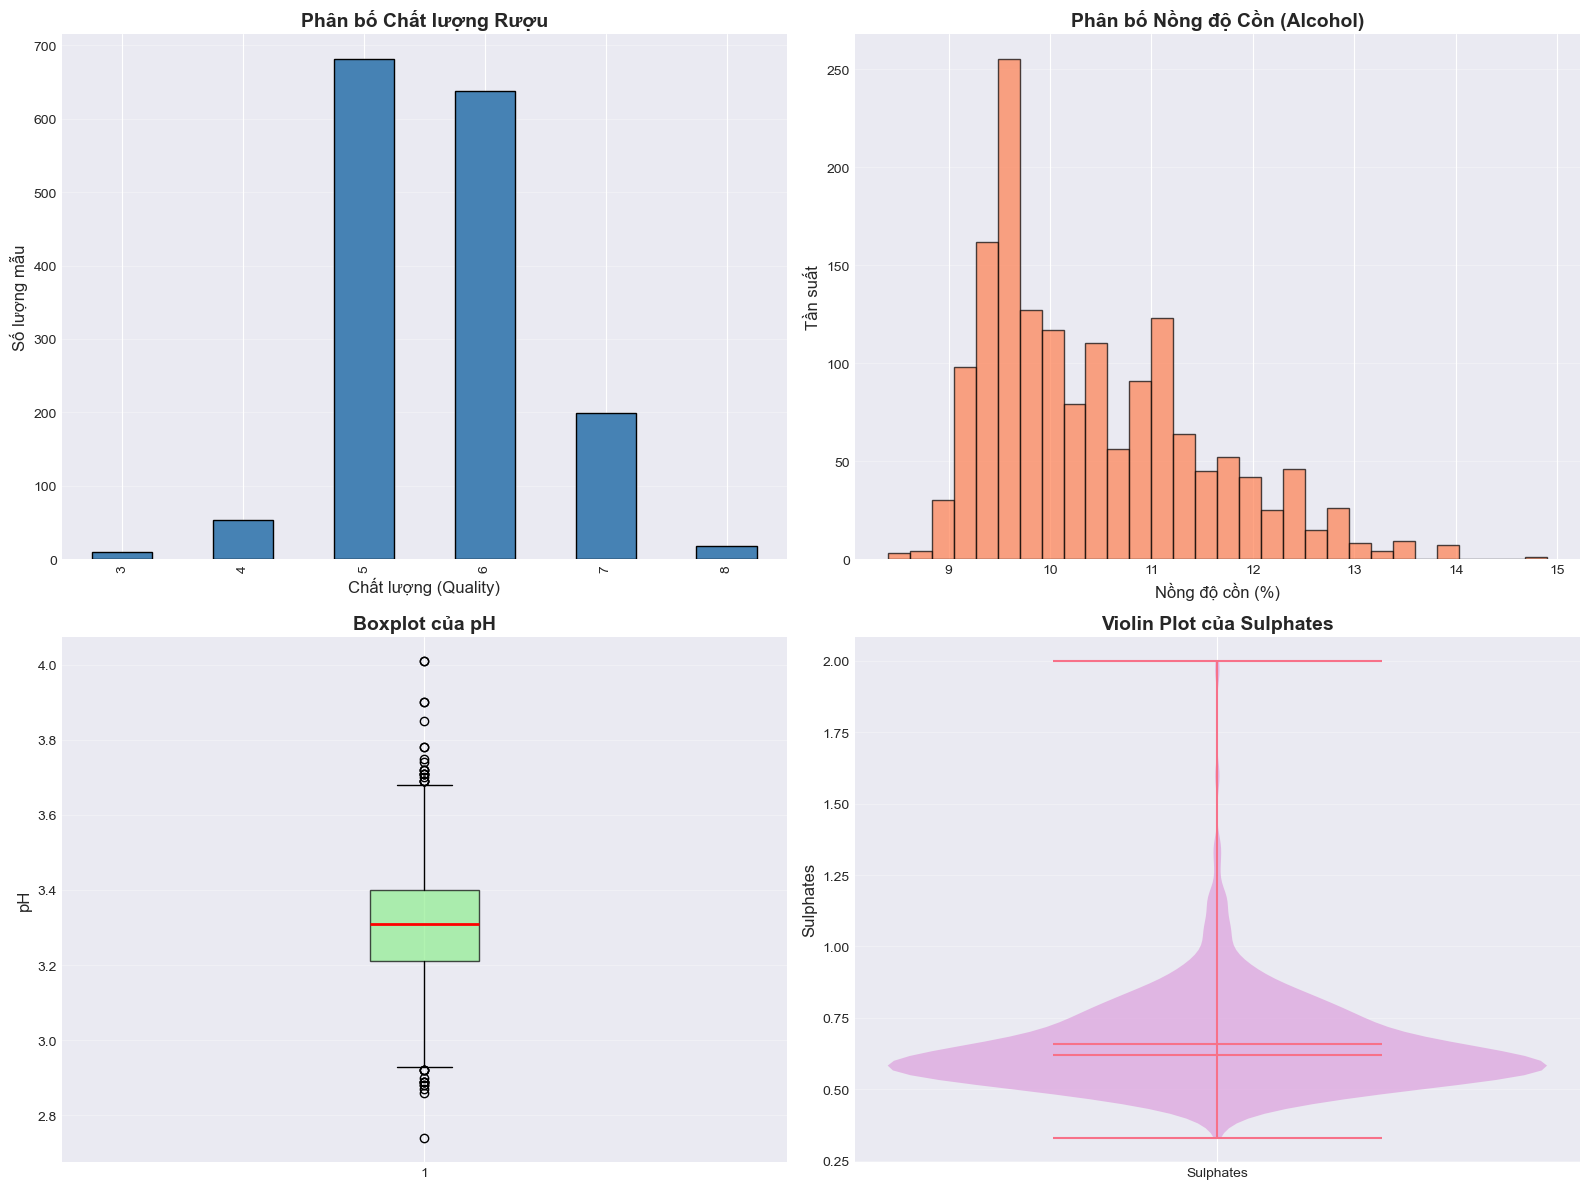

In [31]:
# Tạo biểu đồ tổng hợp
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bar chart cho quality
ax1 = axes[0, 0]
quality_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Phân bố Chất lượng Rượu', fontsize=14, fontweight='bold')
ax1.set_xlabel('Chất lượng (Quality)', fontsize=12)
ax1.set_ylabel('Số lượng mẫu', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Histogram cho alcohol
ax2 = axes[0, 1]
ax2.hist(wine_data['alcohol'], bins=30, color='coral', edgecolor='black', alpha=0.7)
ax2.set_title('Phân bố Nồng độ Cồn (Alcohol)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Nồng độ cồn (%)', fontsize=12)
ax2.set_ylabel('Tần suất', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Boxplot cho pH
ax3 = axes[1, 0]
ax3.boxplot(wine_data['pH'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax3.set_title('Boxplot của pH', fontsize=14, fontweight='bold')
ax3.set_ylabel('pH', fontsize=12)
ax3.grid(axis='y', alpha=0.3)

# Violin plot cho sulphates
ax4 = axes[1, 1]
parts = ax4.violinplot([wine_data['sulphates']], positions=[1], 
                       showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('plum')
    pc.set_alpha(0.7)
ax4.set_title('Violin Plot của Sulphates', fontsize=14, fontweight='bold')
ax4.set_ylabel('Sulphates', fontsize=12)
ax4.set_xticks([1])
ax4.set_xticklabels(['Sulphates'])
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.2. Phân bố của tất cả các biến số

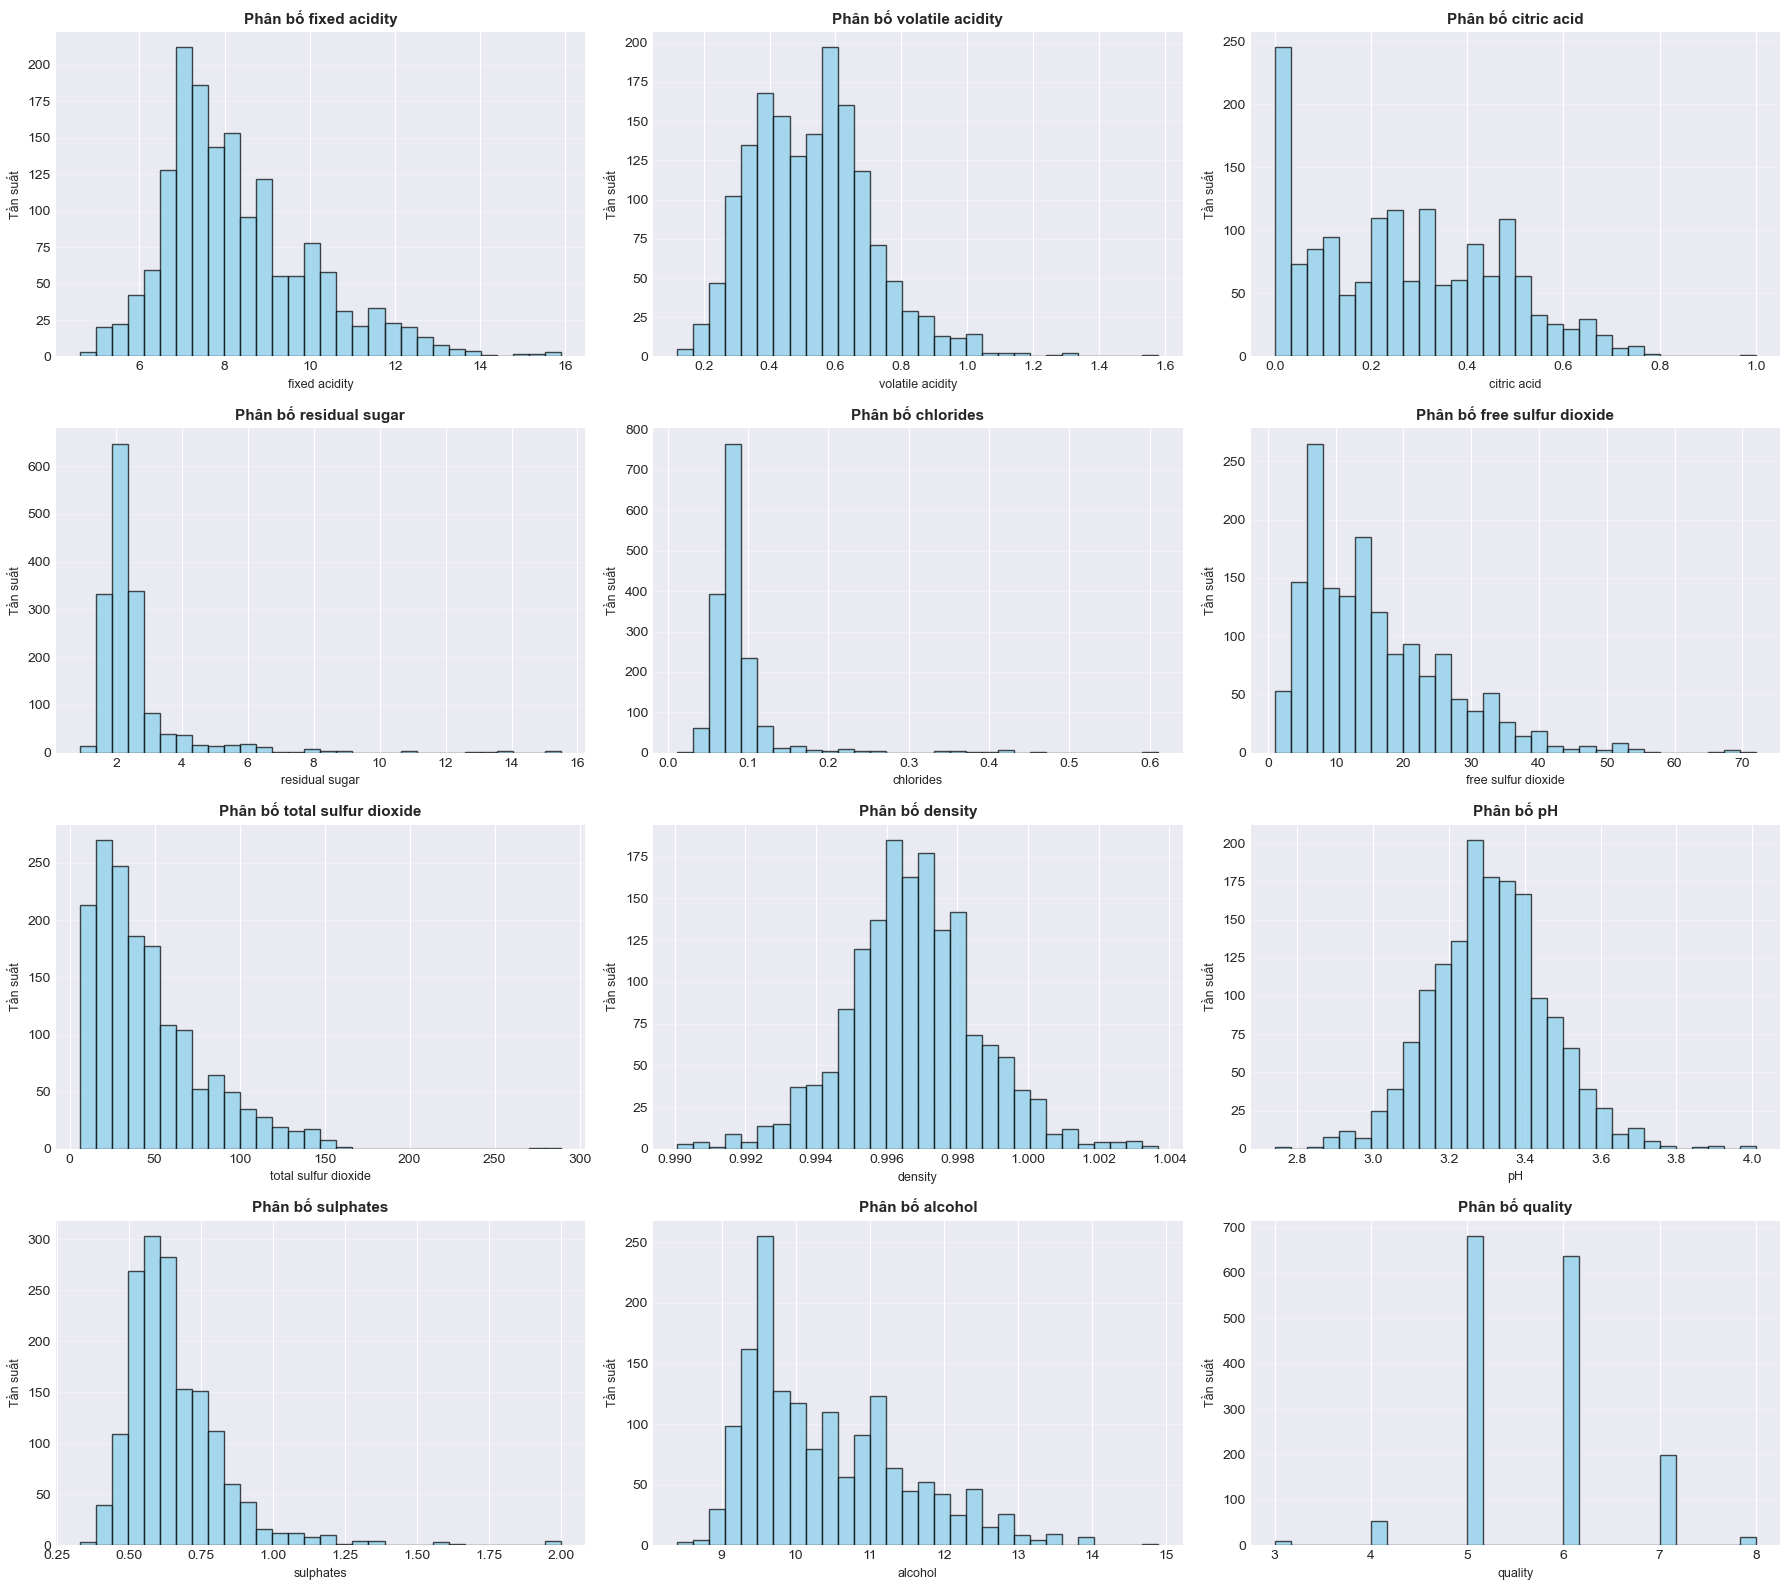

In [32]:
# Histogram cho tất cả các biến
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(wine_data[col], bins=30, color='skyblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Phân bố {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Tần suất', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. PHÂN TÍCH HAI BIẾN

### 6.1. Ma trận tương quan

In [33]:
# Tính ma trận tương quan
correlation_matrix = wine_data.corr()

# Hiển thị tương quan với quality
print("TƯƠNG QUAN CỦA CÁC BIẾN VỚI QUALITY:")
print("="*50)
print(correlation_matrix['quality'].sort_values(ascending=False))

TƯƠNG QUAN CỦA CÁC BIẾN VỚI QUALITY:
quality                 1.00
alcohol                 0.48
sulphates               0.25
citric acid             0.23
fixed acidity           0.12
residual sugar          0.01
free sulfur dioxide    -0.05
pH                     -0.06
chlorides              -0.13
density                -0.17
total sulfur dioxide   -0.19
volatile acidity       -0.39
Name: quality, dtype: float64


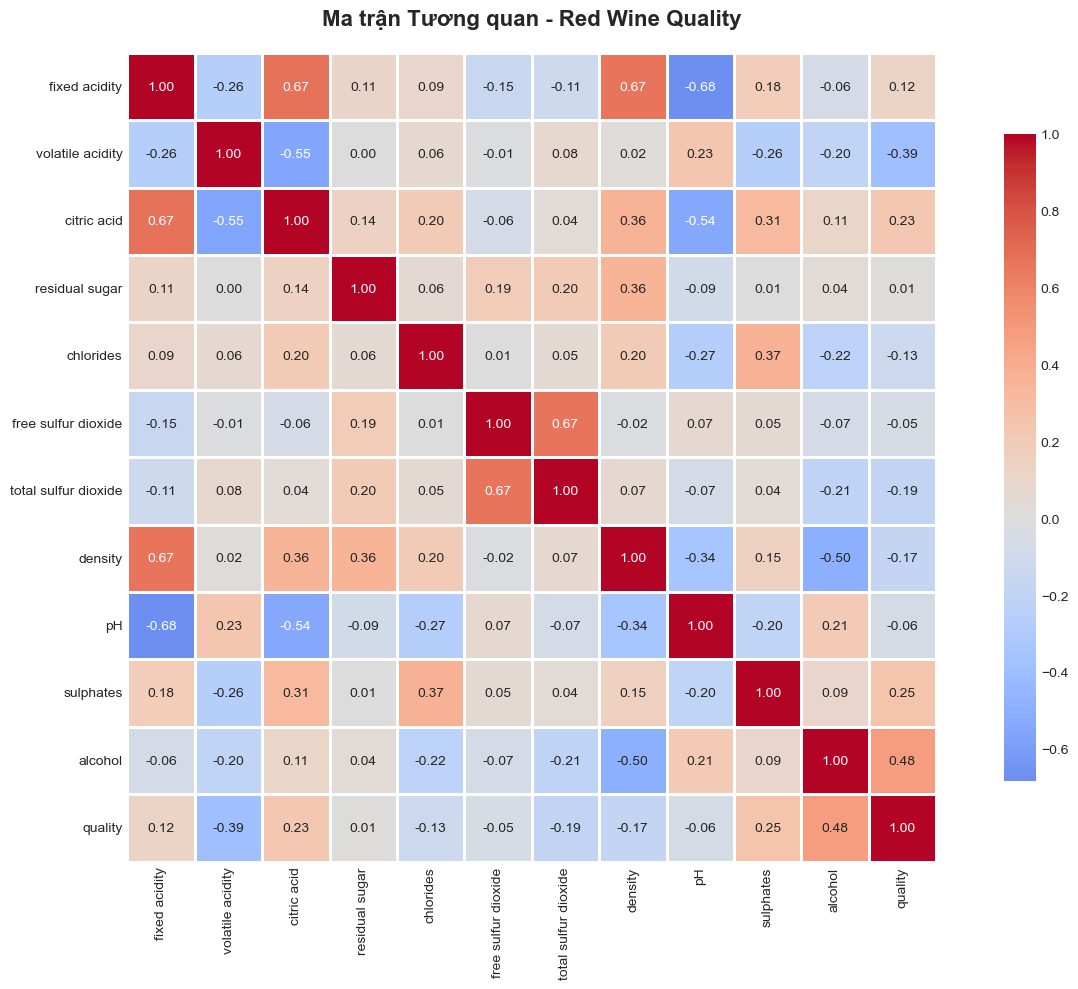

In [34]:
# Vẽ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận Tương quan - Red Wine Quality', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 6.2. Scatter plots - Mối quan hệ với Quality

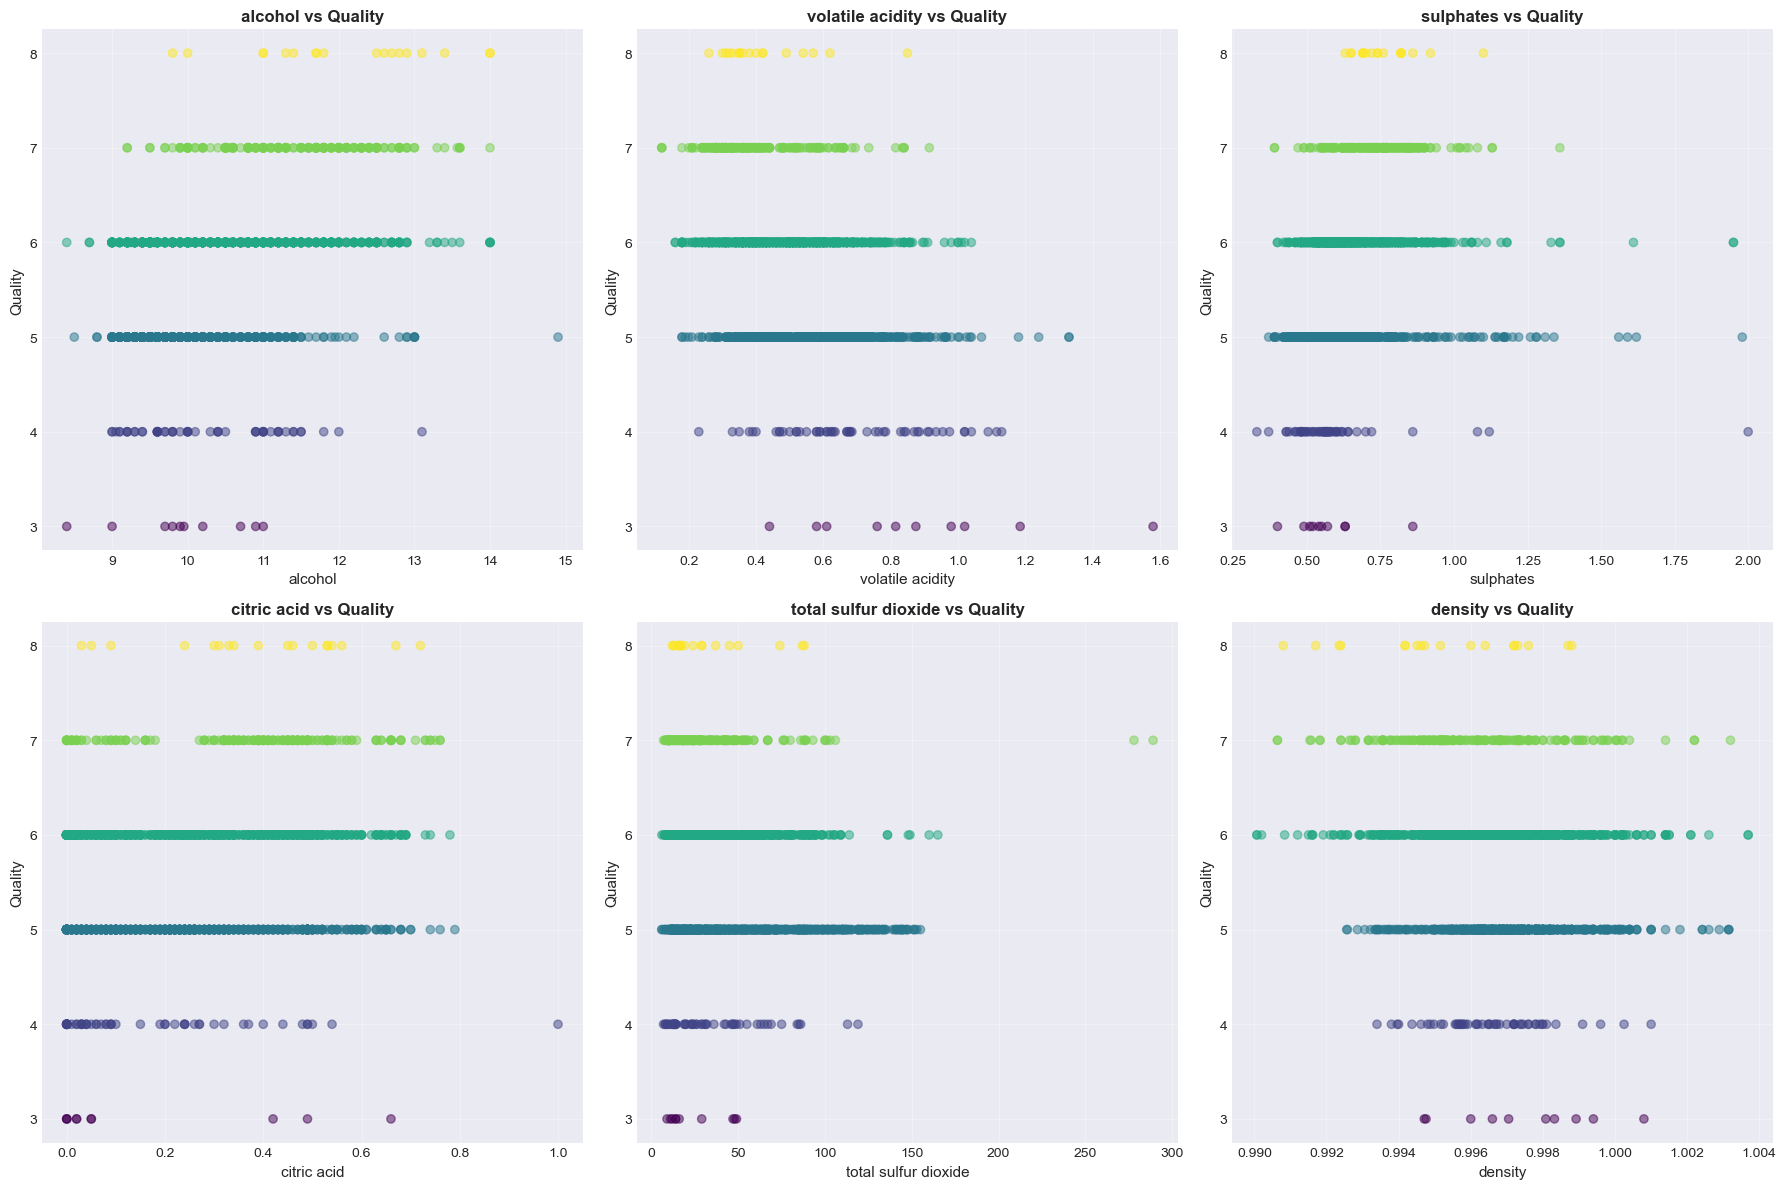

In [35]:
# Scatter plots cho các biến quan trọng
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

important_features = ['alcohol', 'volatile acidity', 'sulphates', 
                     'citric acid', 'total sulfur dioxide', 'density']

for idx, feature in enumerate(important_features):
    axes[idx].scatter(wine_data[feature], wine_data['quality'], 
                     alpha=0.5, c=wine_data['quality'], cmap='viridis')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Quality', fontsize=11)
    axes[idx].set_title(f'{feature} vs Quality', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3. Boxplot - So sánh các biến theo Quality

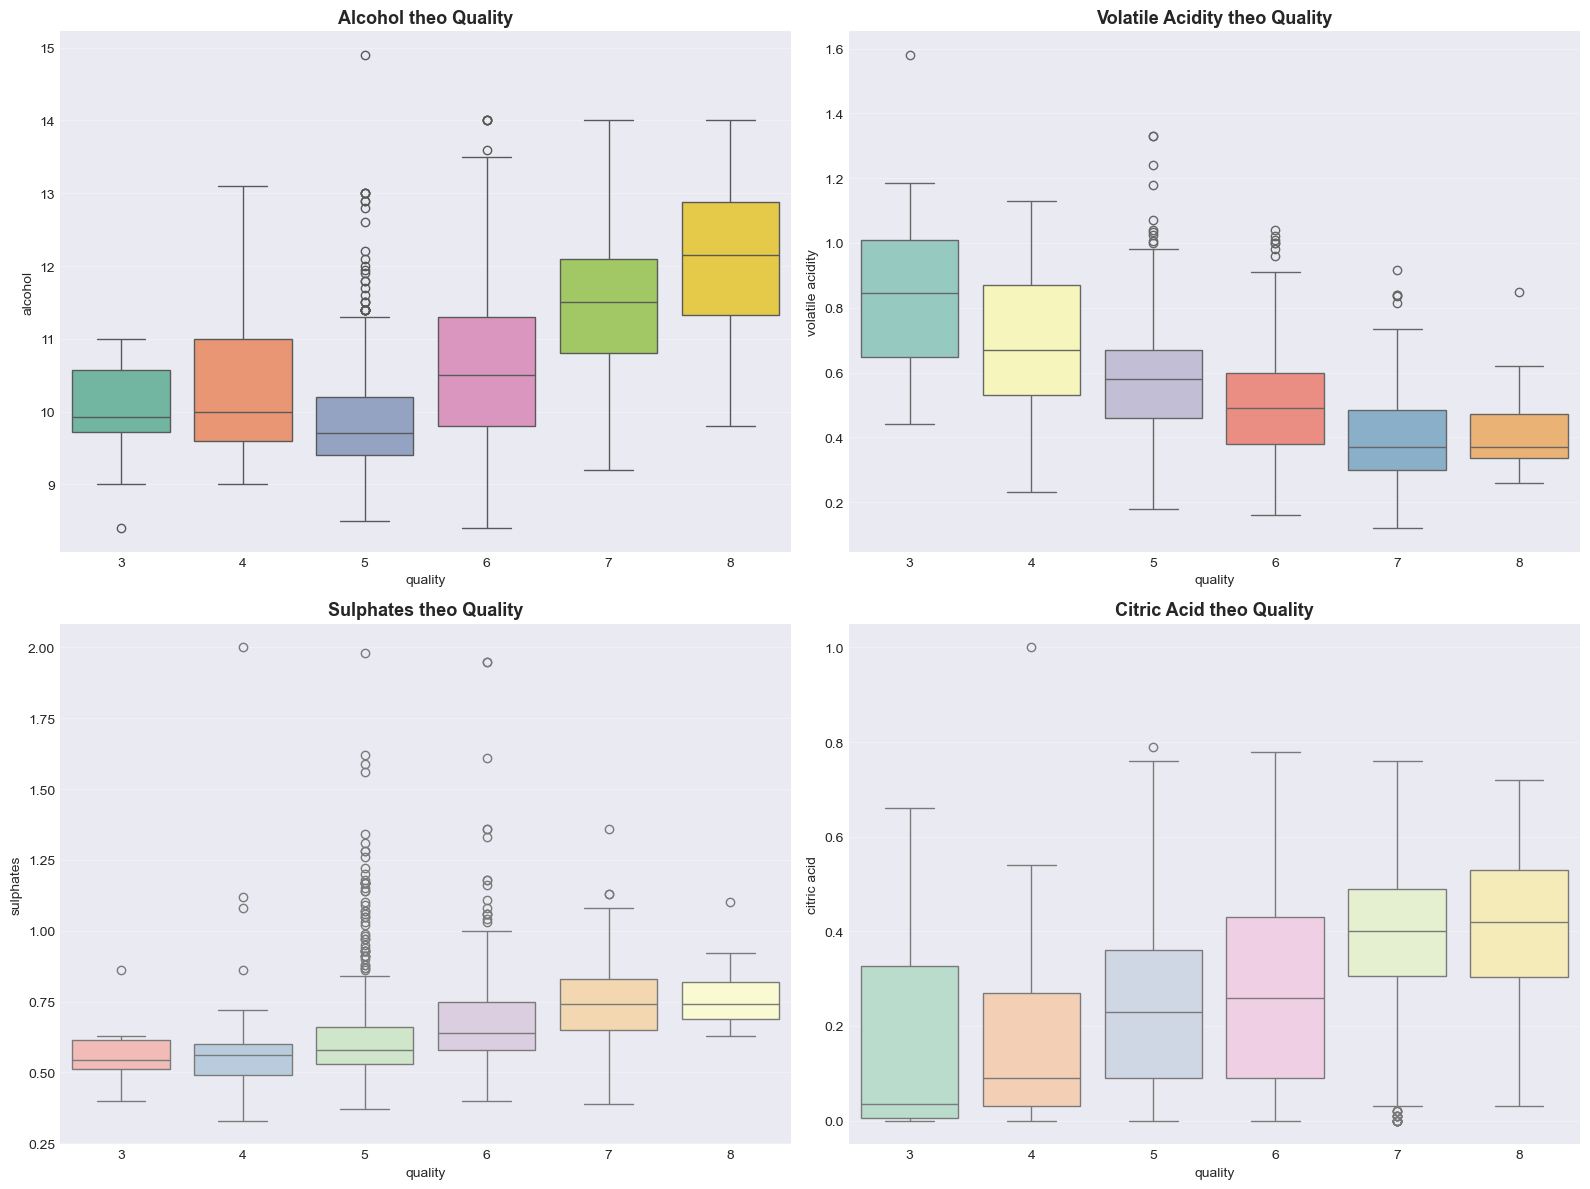

In [36]:
# Boxplot cho các biến quan trọng theo quality
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Alcohol vs Quality
sns.boxplot(data=wine_data, x='quality', y='alcohol', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Alcohol theo Quality', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Volatile Acidity vs Quality
sns.boxplot(data=wine_data, x='quality', y='volatile acidity', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('Volatile Acidity theo Quality', fontsize=13, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Sulphates vs Quality
sns.boxplot(data=wine_data, x='quality', y='sulphates', ax=axes[1, 0], palette='Pastel1')
axes[1, 0].set_title('Sulphates theo Quality', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Citric Acid vs Quality
sns.boxplot(data=wine_data, x='quality', y='citric acid', ax=axes[1, 1], palette='Pastel2')
axes[1, 1].set_title('Citric Acid theo Quality', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.4. Pairplot cho các biến quan trọng

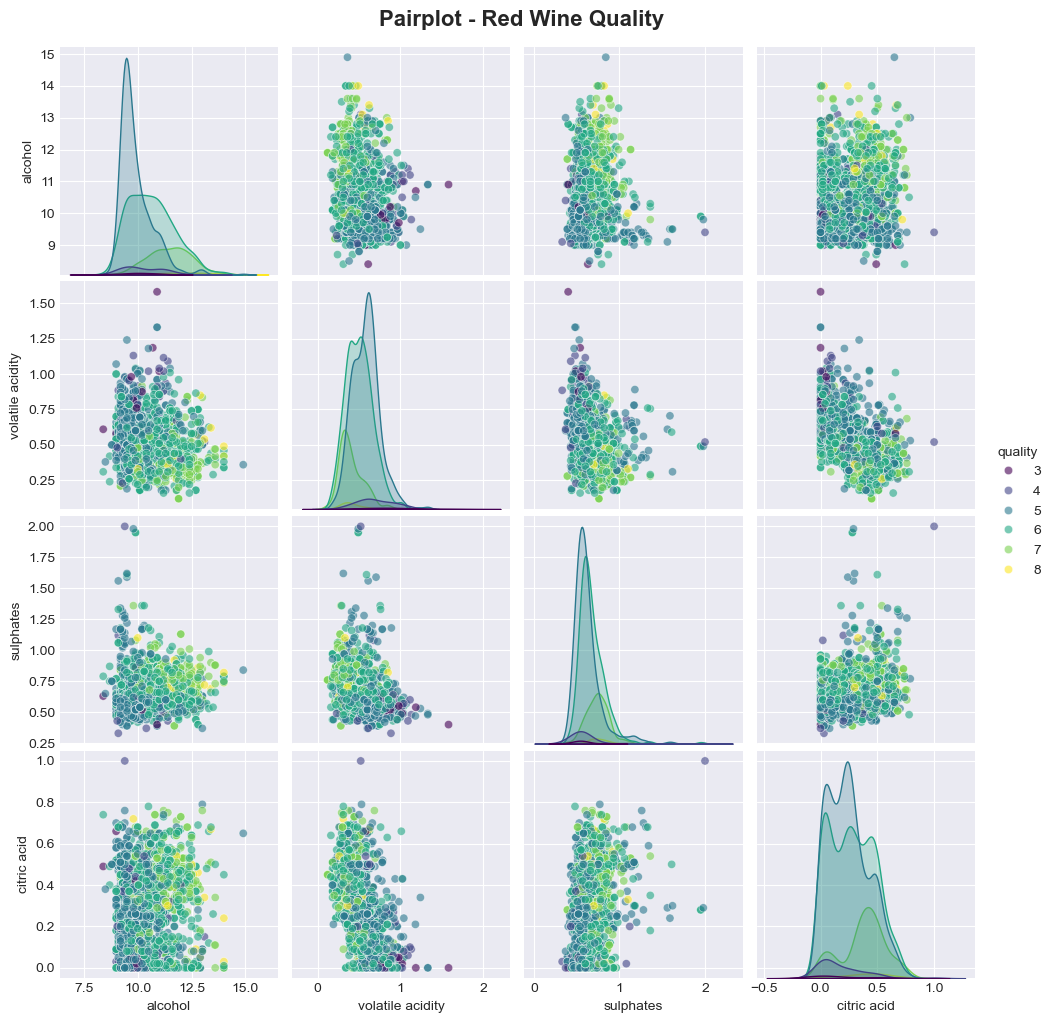

In [37]:
# Pairplot
important_cols = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
pairplot_data = wine_data[important_cols]

sns.pairplot(pairplot_data, hue='quality', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot - Red Wine Quality', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## 7. KẾT LUẬN VÀ NHẬN XÉT

### Những phát hiện chính:

#### 1. PHÂN BỐ DỮ LIỆU:
- Chất lượng rượu tập trung chủ yếu ở mức 5-6 (phân bố gần chuẩn)
- Ít mẫu có chất lượng rất thấp (3) hoặc rất cao (8)
- Dữ liệu không có giá trị thiếu

#### 2. TƯƠNG QUAN VỚI CHẤT LƯỢNG:
- **Alcohol**: Tương quan dương mạnh nhất (+0.48)
- **Volatile Acidity**: Tương quan âm mạnh (-0.39)
- **Sulphates**: Tương quan dương (+0.25)
- **Citric Acid**: Tương quan dương yếu (+0.23)

#### 3. OUTLIERS:
- Nhiều biến có outliers (residual sugar, chlorides, free sulfur dioxide)
- Cần xem xét xử lý outliers trước khi xây dựng mô hình
